## Health Data Science Scenario - Heart Disease Prediction  - ML

# **Contents**

[link text](#scrollTo=ZN44B2KrcA6i)


#### 1. Research Question / Goal
#### 2. Data exploration (EDA) and manipulation: Preprocessing
#### 3. Training and Test sets
#### 4. Machine learning algorithms
#### 5. Metrics Evaluation

#### **1. Research Question / Goal** <a id=”chapter2″></a>

The goal is to predict presence of heart disease in a patient. This is a classification problem. We will use several ML algorithms and evaluate which is the best algorithm.

#### **2. Data exploration (EDA) and manipulation: Preprocessing**

A. Identify the dataset and define/describe each variable

B. EDA (Initial visualisation, Data cleaning, Data exploration)


---
**A. Dataset**

The dataset is available through the University of California, Irvine Machine learning repository.

Url:
http:////archive.ics.uci.edu/ml/datasets/Heart+Disease

This dataset contains patient data concerning heart disease diagnosis that was collected at several locations around the world. There are 76 attributes, including age, sex, resting blood pressure, cholestoral levels, echocardiogram data, exercise habits, and many others. All published studies using this data focus on a subset of 14 attributes. More specifically, we will use the data collected at the Cleveland Clinic Foundation.

* `age` :   The person's age in years
* `sex` :   The person's sex (1 = male, 0 = female)
* `cp` :   The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
* `trestbps` :   The person's resting blood pressure (mm Hg on admission to the hospital)
* `chol` :   The person's cholesterol measurement in mg/dl
* `fbs` :   The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
* `restecg` :   Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
* `thalach` :   The person's maximum heart rate achieved
* `exang` :   Exercise induced angina (1 = yes; 0 = no)
* `oldpeak` :   ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. See more here)
* `slope` :   the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
* `ca` :   The number of major vessels (0-3)
* `thal` :   A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
* `target` :   Heart disease (0 = no, 1 = yes)

---

In [ ]:
# check required libraries are installed if not calling system to install
import sys
import subprocess
import pkg_resources

required = {'numpy', 'pandas', 'plotnine', 'matplotlib', 'seaborn',
            'scikit-learn'}
installed = {pkg.key for pkg in pkg_resources.working_set}
missing = required - installed

if missing:
    print('Installing: ', missing)
    python = sys.executable
    subprocess.check_call([python, '-m', 'pip', 'install', *missing], stdout=subprocess.DEVNULL)
# delete unwanted variables
del required
del installed
del missing

In [ ]:
# Mount Google Drive
from google.colab import drive

root = '/content/drive'
drive.mount(root)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Change the project paths and the paths according to where you have placed your files:
from pathlib import Path

project_path = Path(root) / 'MyDrive' / 'JBPREP'


In [ ]:
# import
import pandas as pd
import numpy as np
import sklearn
import matplotlib
import matplotlib.pyplot as plt
import keras
import seaborn as sns
import pylab as pl
from plotnine import *
from IPython.display import display

In [ ]:
# Load the data
# import the heart disease dataset
url = "http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"

# the names will be the names of each column as given in the variables table (http:////archive.ics.uci.edu/ml/datasets/Heart+Disease)
names = ['age', 'sex', 'cp', 'trestbps',
        'chol', 'fbs', 'restecg', 'thalach',
        'exang', 'oldpeak', 'slope', 'ca',
        'thal', 'target']

# read the csv
heart = pd.read_csv(url, names=names, sep= ',')


In [ ]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0



---
**B. Data Exploration and Preprocessing**


In [ ]:
heart.shape

(303, 14)

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heart.describe(include= 'all')

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303,303,303.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,3.0,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,176,166,NaN
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,NaN,NaN,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,NaN,NaN,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,NaN,NaN,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,NaN,NaN,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,NaN,NaN,2.000000


In [ ]:
heart.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [ ]:
heart['ca'].value_counts()

ca
0.0    176
1.0     65
2.0     38
3.0     20
?        4
Name: count, dtype: int64

In [ ]:
heart['thal'].value_counts()

thal
3.0    166
7.0    117
6.0     18
?        2
Name: count, dtype: int64

**Missing data** <a id=”chapter2″></a>

In [ ]:
# replace '?' with NaN
heart = heart.replace('?', np.NaN)

In [ ]:
# check for missing values (null values)
heart.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          4
thal        2
target      0
dtype: int64

In [ ]:
# check rows with NaN
heart[pd.isnull(heart).any(axis = 1)]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
87,53.0,0.0,3.0,128.0,216.0,0.0,2.0,115.0,0.0,0.0,1.0,0.0,NaN,0
166,52.0,1.0,3.0,138.0,223.0,0.0,0.0,169.0,0.0,0.0,1.0,NaN,3.0,0
192,43.0,1.0,4.0,132.0,247.0,1.0,2.0,143.0,1.0,0.1,2.0,NaN,7.0,1
266,52.0,1.0,4.0,128.0,204.0,1.0,0.0,156.0,1.0,1.0,2.0,0.0,NaN,2
287,58.0,1.0,2.0,125.0,220.0,0.0,0.0,144.0,0.0,0.4,2.0,NaN,7.0,0
302,38.0,1.0,3.0,138.0,175.0,0.0,0.0,173.0,0.0,0.0,1.0,NaN,3.0,0


In [ ]:
# drop all rows with missing value (NaN)
heart = heart.dropna()

In [ ]:
heart.shape

(297, 14)

In [ ]:
# check the values of target
heart['target'].value_counts()

target
0    160
1     54
2     35
3     35
4     13
Name: count, dtype: int64

In [ ]:
# convert 'target' to binary class - heart disease or no heart disease
heart.loc[heart['target'] > 0, 'target'] = 1

In [ ]:
heart['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [ ]:
heart.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca           object
thal         object
target        int64
dtype: object

In [ ]:
# transform data to numeric
heart = heart.apply(pd.to_numeric)

In [ ]:
heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']] = heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'ca', 'thal', 'target']].astype(np.int64)

In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,3.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,1.602694,0.676768,4.730640,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,1.938629,0.499340
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,1.000000


In [ ]:
heart.dtypes

age         float64
sex           int64
cp            int64
trestbps    float64
chol        float64
fbs           int64
restecg       int64
thalach     float64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [ ]:
# numeric variables: age, trestbps, chol, thalach, oldpeak
# factor: sex, cp, fbs, restecg, exang, slope, ca, thal, target    -> transform these from continuous to categorical variables

In [ ]:
heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'thal', 'target']] = heart[['sex', 'cp', 'fbs', 'restecg','exang', 'slope', 'thal', 'target']].astype('object')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       297 non-null    float64
 1   sex       297 non-null    object 
 2   cp        297 non-null    object 
 3   trestbps  297 non-null    float64
 4   chol      297 non-null    float64
 5   fbs       297 non-null    object 
 6   restecg   297 non-null    object 
 7   thalach   297 non-null    float64
 8   exang     297 non-null    object 
 9   oldpeak   297 non-null    float64
 10  slope     297 non-null    object 
 11  ca        297 non-null    int64  
 12  thal      297 non-null    object 
 13  target    297 non-null    object 
dtypes: float64(5), int64(1), object(8)
memory usage: 34.8+ KB


In [ ]:
heart.describe()

,age,trestbps,chol,thalach,oldpeak,ca
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,131.693603,247.350168,149.599327,1.055556,0.676768
std,9.049736,17.762806,51.997583,22.941562,1.166123,0.938965
min,29.000000,94.000000,126.000000,71.000000,0.000000,0.000000
25%,48.000000,120.000000,211.000000,133.000000,0.000000,0.000000
50%,56.000000,130.000000,243.000000,153.000000,0.800000,0.000000
75%,61.000000,140.000000,276.000000,166.000000,1.600000,1.000000
max,77.000000,200.000000,564.000000,202.000000,6.200000,3.000000


In [ ]:
heart.describe(include = 'object')

,sex,cp,fbs,restecg,exang,slope,thal,target
count,297,297,297,297,297,297,297,297
unique,2,4,2,3,2,3,3,2
top,1,4,0,0,0,1,3,0
freq,201,142,254,147,200,139,164,160


**Visualizing the features**
                                                 
* [Back to main](#scrollTo=IjIAB86MlTU8&line=3&uniqifier=1)



In [ ]:
# numeric variables: age, trestbps, chol, thalach, oldpeak
# factor: sex, cp, fbs, restecg, exang, slope, thal, target    -> transform these from continuous to categorical variables

In [ ]:
# determine index for continuous variables
numerical_features = heart.dtypes[heart.dtypes!= 'object'].index

# determine index for categorical variables
categorical_features = heart.dtypes[heart.dtypes == 'object'].index



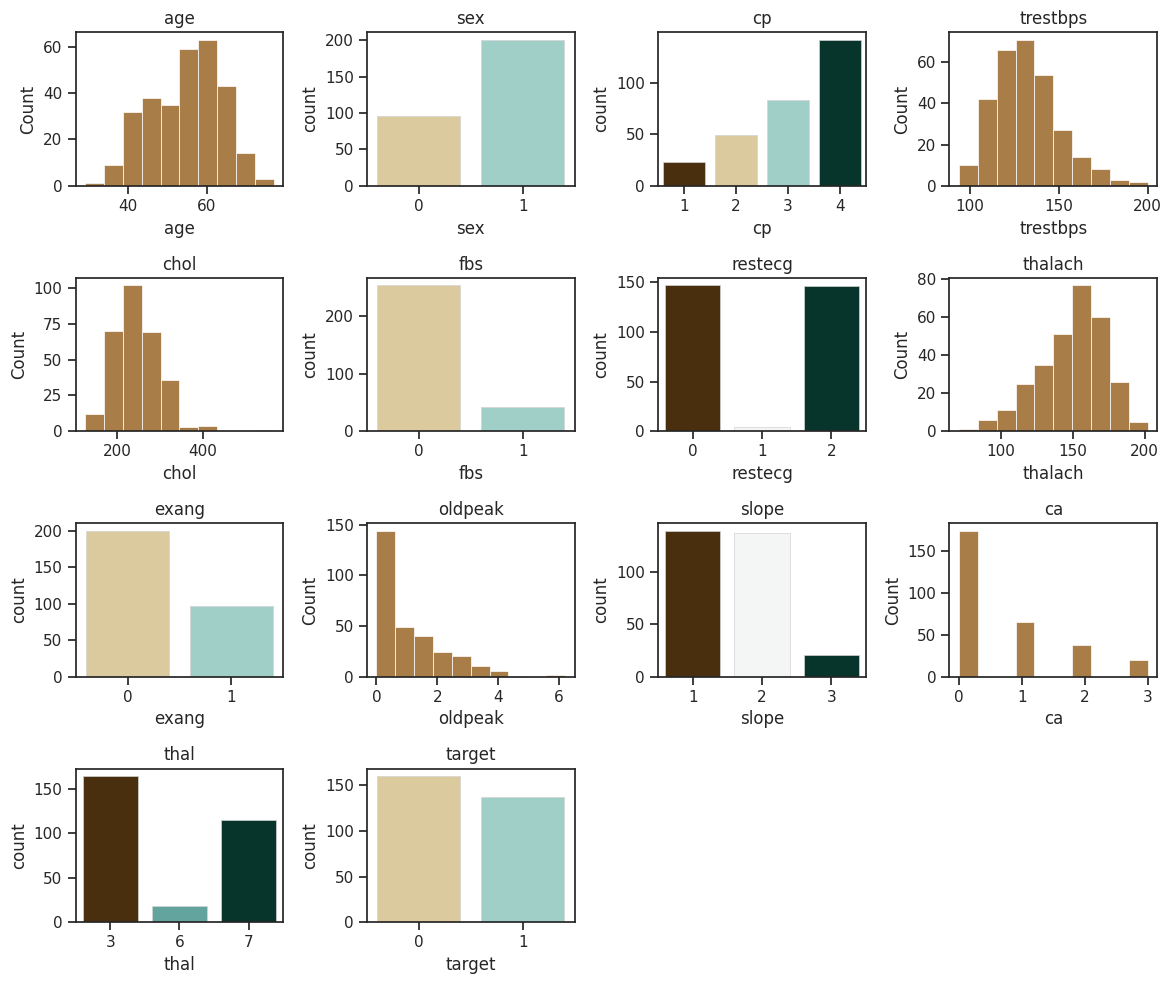

In [ ]:
fig, axes = plt.subplots(4, 4, figsize = (12, 10))

for index, columnName in enumerate(heart.columns[0:]):
    ax =axes.reshape(-1)[index]
    if heart[columnName].dtype.kind == 'O':
        a = sns.countplot(x = columnName, data = heart, ax =ax, hue = columnName, palette= 'BrBG', legend=False, edgecolor = "lightgrey", linewidth = 0.5 )
    else:
        b = sns.histplot(x = columnName, data = heart, ax =ax,  color = '#8c510a', legend=False, bins =10, edgecolor = "white", linewidth = 0.5 )
    t = ax.set_title(columnName)
plt.tight_layout()

axes.flat[-2].set_visible(False)
axes.flat[-1].set_visible(False)

---

**Visualising the features regarding "heart disease" (target = 1)**

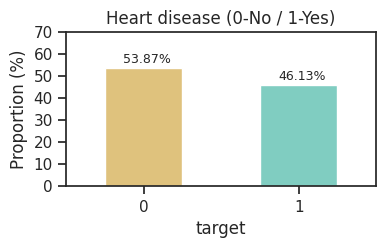

In [ ]:
# Plot proportions for each class of 'heart disease'
color = ["#dfc27d", "#80cdc1"]
ax = (heart.target.value_counts()/len(heart)*100).plot(kind = 'bar', color = color, rot = 0, figsize =(4, 2))
ax.set_yticks(np.arange(0, 75, 10))
ax.set_ylabel('Proportion (%)')
ax.set_title('Heart disease (0-No / 1-Yes)')

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x() + 0.12, i.get_height()+2, str(round((i.get_height()/total)*100, 2))+'%', fontsize = 9)

**Histograms of continuous variables regarding target ("Heart disease")**

In [ ]:
# Selecting continuous variables to plot them all together. Python command: DataFrame[[column selection]]
heart_cont_plot = heart[['oldpeak', 'trestbps', 'chol', 'thalach', 'age', 'target']]


# Transforming data from wide to long format for our plots. Python command: DataFrame.melt([group variable],var_name,value_name)
heart_cont_plot = heart_cont_plot.melt(['target'], var_name='cols',  value_name='vals')
heart_cont_plot.sort_values('target', inplace=True)

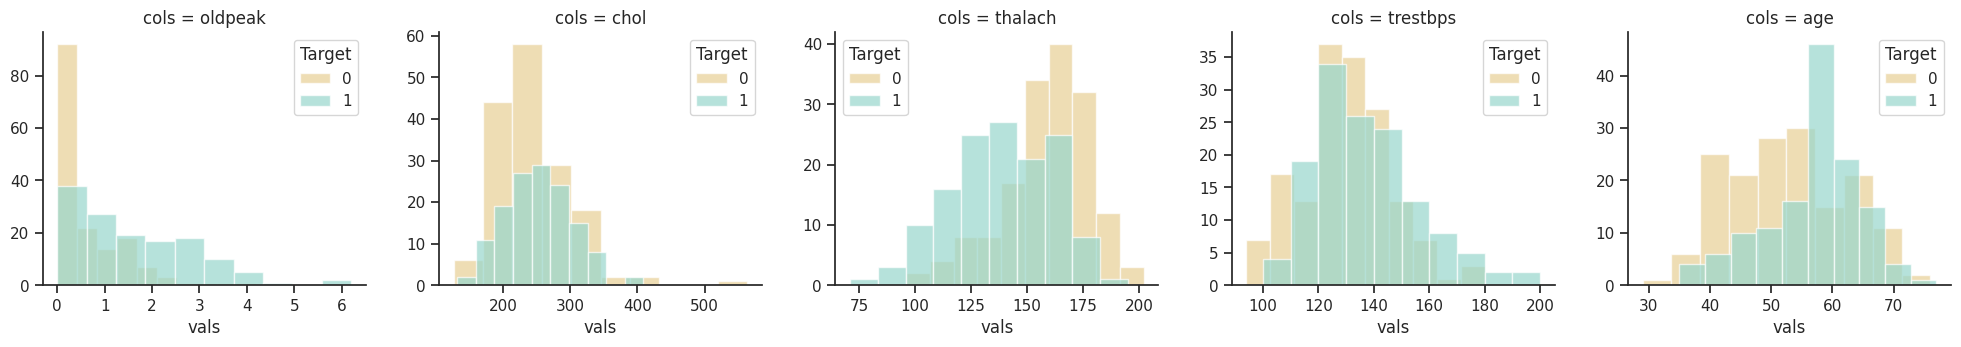

In [ ]:
sns.set(style = "ticks", font_scale = 1)

# Plotting the continuous/numeric variables of dataset, regarding 'target'
p = sns.FacetGrid(heart_cont_plot, col='cols', hue= 'target', palette='BrBG', legend_out=False,
                  sharex=False, sharey=False, col_wrap=5)
p = (p.map(plt.hist, "vals", alpha=0.7).add_legend())
p.fig.set_size_inches(20,4)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Target")


**Density plots of continuous variables regarding target ("Heart disease")**

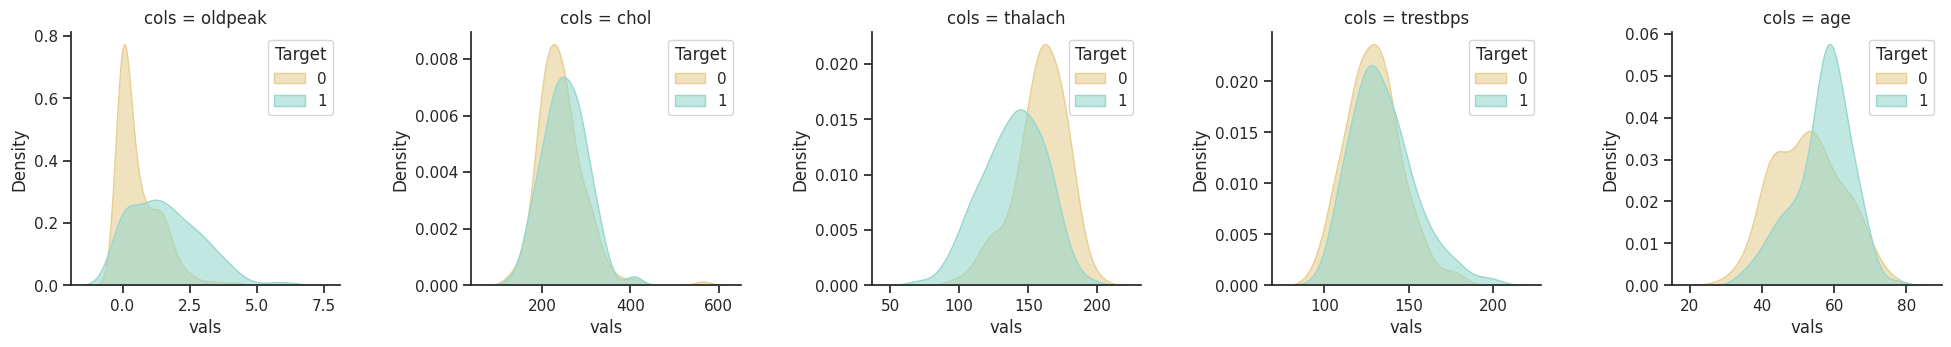

In [ ]:
sns.set(style = "ticks", font_scale = 1)

# Plotting the continuous/numeric variables of dataset, regarding 'target'
p = sns.FacetGrid(heart_cont_plot, col='cols', hue= 'target', palette='BrBG', legend_out=False,
                  sharex=False, sharey=False, col_wrap=5)
p = (p.map(sns.kdeplot, "vals", alpha=0.6, fill = True, bw_method = 'scott', bw_adjust = 1).add_legend())     ###bw
p.fig.set_size_inches(20,4)

# Adding the legend to each plot
for ax in p.axes.ravel():
    ax.legend(title="Target")

**Bar plots of categorical variables regarding target ("Heart disease")**

<Axes: >

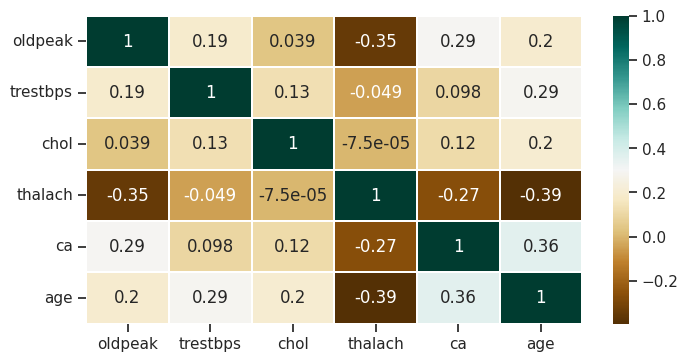

In [ ]:
heart_cont_plot2 = heart[['oldpeak', 'trestbps', 'chol', 'thalach', 'ca', 'age']]


f, ax = plt.subplots(figsize = (8, 4))
sns.heatmap(heart_cont_plot2.corr(), linewidths = 0.1, annot = True, ax = ax, cmap = 'BrBG')

In [ ]:
heart['target'].value_counts()

target
0    160
1    137
Name: count, dtype: int64

In [ ]:
def stacked_percent_bar(features, data,
                        outcome_pal = {0: "#dfc27d", 1: "#80cdc1"},
                        title = 'Categorical Features: Differences in the Outcome',
                        label = [0, 1] ):
    '''
    Input:
        features: List of categorical features to be plotted
        data: Dataset with all the variables we need to plot (including the outcome variable, 'target')
        outcome_pal: Palette of colours for mapping the outcome variable
        title: Title of the grpah
        label: Labelling the categories of the outcome variable 'readmission' (yes/no)
    Output: A grid of stacked percent graphs for each features regarding the outcome

    '''

    # Create the grid of the results
    fig = plt.figure(figsize=(12,5))
    fig.subplots_adjust(hspace=0.5, wspace=0.6)
    fig.suptitle(title, fontsize=10)

    # Loop through each feature in the list
    for i in range(1, len(features)+1):
        # Create frequency counts by the outcome variable, convert into a dataframe
        frequencies_0 = data[features[i-1]][data.target == 0].value_counts()
        frequencies_1 = data[features[i-1]][data.target == 1].value_counts()
        freq_df = pd.concat([frequencies_0.sort_index(),frequencies_1.sort_index()],axis=1).transpose()

        # Normalise the frequencies (%)
        totals = [a+b for a,b in zip(freq_df.iloc[0,:], freq_df.iloc[1,:])]
        norm_0 = [a / b * 100 for  a,b in zip(freq_df.iloc[0,:], totals)]
        norm_1 = [a / b * 100 for  a,b in zip(freq_df.iloc[1,:], totals)]

        # add a subplot with the dimensions we need to visualise results
        ax = fig.add_subplot(2, 4, i)

        # 'No' cases Bars
        ax.bar(x = list(freq_df.columns), # Bar positions
               height = norm_0, # Bar heights
               color=outcome_pal[0], edgecolor='white',
               alpha=0.75,
               label=label[0]) # Class label

        # 'Yes' cases Bars
        ax.bar(x = list(freq_df.columns), # Bar positions
               height = norm_1, # Bar heights
               bottom=norm_0,   # Stacked bar graph with 'no' cases on the bottom
               color=outcome_pal[1], edgecolor='white',
               alpha=0.75,
               label=label[1])  # Class label

        # Set axes, labels and title
        ax.set_xticks(frequencies_0.index)
        ax.set_ylabel('%')
        ax.set_title(features[i-1])
        ax.axhline(y=50, ls='--', color='black')
        plt.setp(ax.get_xticklabels(), rotation=0)

    # Set the legend
    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels,  loc='right', title='Target')


In [ ]:
# Selecting the categorical variables we want to plot
# determine index for categorical variables
# categorical_features = heart.dtypes[heart.dtypes == 'category'].index
# Set as categorical features as cagtegory data types

# Selecting continuous variables to plot them all together. Python command: DataFrame[[column selection]]
heart_categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']  # include ca

In [ ]:
heart_cat = heart[['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca', 'target']]

In [ ]:
heart_cat = heart_cat.astype('category')

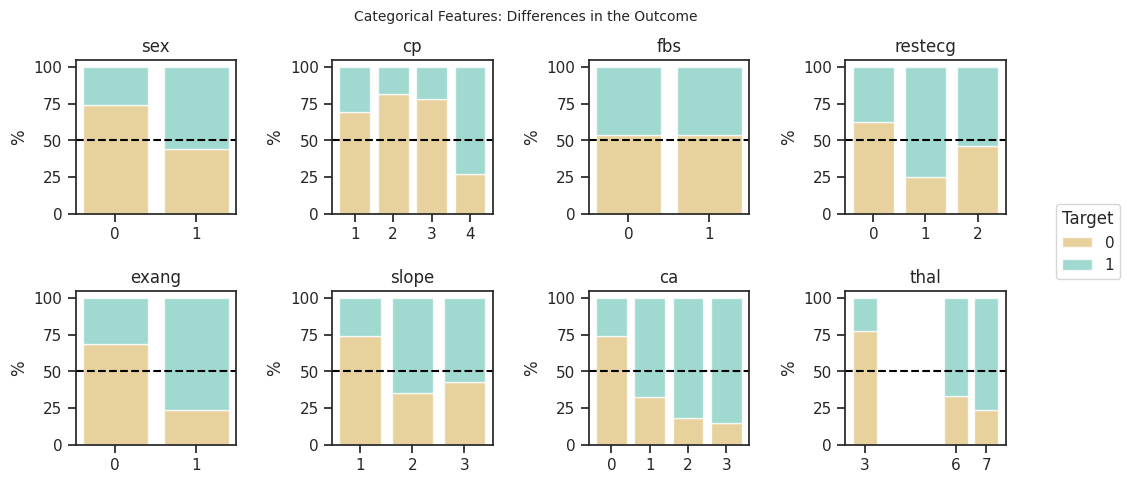

In [ ]:
stacked_percent_bar(features=heart_categorical_features, data=heart_cat)

---

#### **A. KNN Algorithm**

All variables need to be numerical


**1. Hot encoding: Creating dummy variables**

In [ ]:
# save target
target = heart['target'].astype('int64')

In [ ]:
# drop target and create dummies
heart = pd.get_dummies(heart.drop('target', axis= 1), dtype=int)
# add target back into heart
heart['target'] = target

In [ ]:
list(heart.columns)

['age',
 'trestbps',
 'chol',
 'thalach',
 'oldpeak',
 'ca',
 'sex_0',
 'sex_1',
 'cp_1',
 'cp_2',
 'cp_3',
 'cp_4',
 'fbs_0',
 'fbs_1',
 'restecg_0',
 'restecg_1',
 'restecg_2',
 'exang_0',
 'exang_1',
 'slope_1',
 'slope_2',
 'slope_3',
 'thal_3',
 'thal_6',
 'thal_7',
 'target']

In [ ]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7,target
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,3,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
2,67.0,120.0,229.0,129.0,2.6,2,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
heart.dtypes

age          float64
trestbps     float64
chol         float64
thalach      float64
oldpeak      float64
ca             int64
sex_0          int64
sex_1          int64
cp_1           int64
cp_2           int64
cp_3           int64
cp_4           int64
fbs_0          int64
fbs_1          int64
restecg_0      int64
restecg_1      int64
restecg_2      int64
exang_0        int64
exang_1        int64
slope_1        int64
slope_2        int64
slope_3        int64
thal_3         int64
thal_6         int64
thal_7         int64
target         int64
dtype: object

**2. Training and Test sets**

In [ ]:
# Split heart dataset into two dataframes: features stored in X and target stored in y
X = heart.drop(['target'], axis = 1)
y = heart[['target']]

In [ ]:
X.shape

(297, 25)

In [ ]:
y.shape

(297, 1)

In [ ]:
X.columns

Index(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'ca', 'sex_0', 'sex_1',
       'cp_1', 'cp_2', 'cp_3', 'cp_4', 'fbs_0', 'fbs_1', 'restecg_0',
       'restecg_1', 'restecg_2', 'exang_0', 'exang_1', 'slope_1', 'slope_2',
       'slope_3', 'thal_3', 'thal_6', 'thal_7'],
      dtype='object')

In [ ]:
y.columns

Index(['target'], dtype='object')

In [ ]:
# Split data into 80% training set and 20% test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.20, random_state = 42)

In [ ]:
X_train.shape

(237, 25)

In [ ]:
X_test.shape

(60, 25)

**3. Standardised the features**

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()


In [ ]:
# Standardize features by removing the mean and scaling to unit variance.
# In this step, we calculate the actual means and variances for each feature in  THE TRAIN SET.
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
scaler.fit(X_train)
# mu-training-set = mean of the age in the training set
# sigma-training-set = standard deviation of the age in the training set

StandardScaler()

In [ ]:
# rescale the training data
X_train_scaled = scaler.transform(X_train)
# (X_train - mu-training-set )/sigma-training-set

In [ ]:
# Check
X_train_scaled

array([[-0.08566824, -0.46258178,  0.31273699, ..., -1.06542721,
        -0.26906912,  1.22259431],
       [-0.97324741, -1.74907836, -0.9879212 , ..., -1.06542721,
        -0.26906912,  1.22259431],
       [-1.3060896 , -0.12697398,  1.2363928 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       ...,
       [ 0.91285833, -0.46258178, -0.9879212 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 0.58001614,  1.43919576,  1.04789162, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-1.63893179,  1.10358796, -0.49781811, ..., -1.06542721,
        -0.26906912,  1.22259431]])

In [ ]:
#To apply predictive models to the scaled data, we also need to transform the test set

In [ ]:
# scale the test data
X_test_scaled = scaler.transform(X_test)
# (X_test - mu-training-set )/sigma-training-set

In [ ]:
# Check
X_test_scaled

array([[-1.5279844 , -0.68632032, -1.74192594, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-0.64040523, -0.12697398,  0.36928735, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 1.24570052, -0.68632032,  0.99134126, ...,  0.93859064,
        -0.26906912, -0.81793281],
       ...,
       [-0.30756304,  0.09676456, -0.91252072, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 0.13622655, -0.68632032, -0.1773661 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-1.417037  ,  0.20863382,  1.2363928 , ..., -1.06542721,
         3.71651719, -0.81793281]])

**3. Building KNN model**

In [ ]:
# We have to convert from y_train from a column vector to a row vector that the algorithm expects:
y_train2=y_train.values.ravel()
print(y_train2)

[1 0 0 0 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 1 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0 1 1
 1 0 0 1 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 1 1 0 0 1 1 1 0 0 0 1 1 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0
 0 0 1 1 0 0 1 0 0 1 1 0 1 1 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 1 0 1 1 1 1 1 1
 1 1 1 0 1 0 0 1 0 0 1 1 1 1 1]


In [ ]:
# find suitable K value
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k=[i for i in range(1,31)]
accuracy=[]

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled, y_train2)
    y_pred = knn.predict(X_test_scaled)
    accuracy.append(accuracy_score(y_test, y_pred))

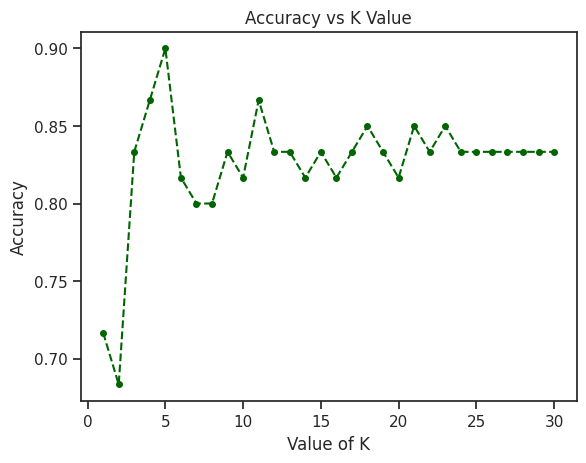

In [ ]:
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K Value")
plt.plot(k,accuracy,color='darkgreen', linestyle='dashed', marker='o', markersize=4)

In [ ]:
# use 5 neighbors, K= 5
knn = KNeighborsClassifier(n_neighbors=5)

In [ ]:
knn.fit(X_train_scaled, y_train2)

KNeighborsClassifier()

**4. Evaluating the KNN model**

In [ ]:
y_pred = knn.predict(X_test_scaled)
print("Test set predictions:\n {}".format(y_pred))

Test set predictions:
 [0 0 0 0 0 0 1 0 1 0 1 0 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 1 0
 1 0 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 1 0 0 1]


In [ ]:
print("Test set score: {:.2f}".format(knn.score(X_test_scaled, y_test)))

Test set score: 0.90


In [ ]:
print('No:', sum(y_test.target==0), ' ','Yes:',sum(y_test.target==1))

No: 32   Yes: 28


In [ ]:
print('No:', sum(y_pred==0), ' ','Yes:',sum(y_pred==1))

No: 34   Yes: 26


[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

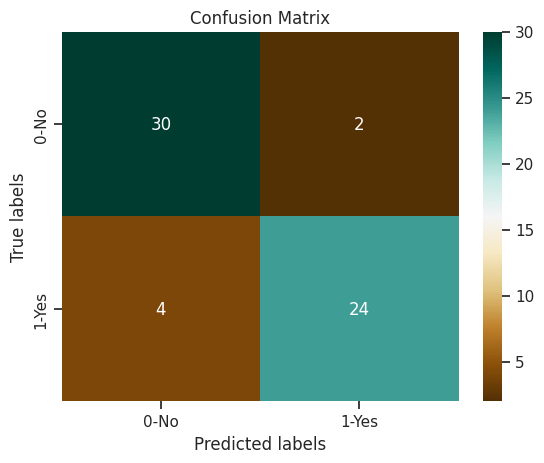

In [ ]:
from sklearn import metrics


# Confusion Matrix
confusion = metrics.confusion_matrix(y_test, y_pred)

# Visualising the confusion matrix of our KNN model
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred, pos_label=1, average='binary')

0.888888888888889

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91        32
           1       0.92      0.86      0.89        28

    accuracy                           0.90        60
   macro avg       0.90      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60



---

#### **B. Logistic Regression**

Categorical - Dummy Variables

Standardization/Normalization

In [ ]:
heart.head()

,age,trestbps,chol,thalach,oldpeak,ca,sex_0,sex_1,cp_1,cp_2,...,restecg_2,exang_0,exang_1,slope_1,slope_2,slope_3,thal_3,thal_6,thal_7,target
0,63.0,145.0,233.0,150.0,2.3,0,0,1,1,0,...,1,1,0,0,0,1,0,1,0,0
1,67.0,160.0,286.0,108.0,1.5,3,0,1,0,0,...,1,0,1,0,1,0,1,0,0,1
2,67.0,120.0,229.0,129.0,2.6,2,0,1,0,0,...,1,0,1,0,1,0,0,0,1,1
3,37.0,130.0,250.0,187.0,3.5,0,0,1,0,0,...,0,1,0,0,0,1,1,0,0,0
4,41.0,130.0,204.0,172.0,1.4,0,1,0,0,1,...,1,1,0,1,0,0,1,0,0,0


In [ ]:
X_train_scaled

array([[-0.08566824, -0.46258178,  0.31273699, ..., -1.06542721,
        -0.26906912,  1.22259431],
       [-0.97324741, -1.74907836, -0.9879212 , ..., -1.06542721,
        -0.26906912,  1.22259431],
       [-1.3060896 , -0.12697398,  1.2363928 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       ...,
       [ 0.91285833, -0.46258178, -0.9879212 , ...,  0.93859064,
        -0.26906912, -0.81793281],
       [ 0.58001614,  1.43919576,  1.04789162, ...,  0.93859064,
        -0.26906912, -0.81793281],
       [-1.63893179,  1.10358796, -0.49781811, ..., -1.06542721,
        -0.26906912,  1.22259431]])

In [ ]:
y_train2

array([1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1])

**1. Training Logistic Regression models**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Training a logistic regression model using L1-norm regularization (Lasso)
# C= 0.01 as first step
Log_Reg_L1 = LogisticRegression(C = 0.1, penalty = 'l1', solver = 'liblinear')
Log_Reg_L1.fit(X_train_scaled, y_train2)


LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [ ]:
# Training a logistic regression model using L2-norm regularization (Ridge)
# C= 0.01 as first step
Log_Reg_L2 = LogisticRegression(C = 0.1, penalty = 'l2', solver = 'liblinear')
Log_Reg_L2.fit(X_train_scaled, y_train2)

LogisticRegression(C=0.1, solver='liblinear')

In [ ]:
Log_Reg_L1.coef_

array([[ 0.        ,  0.0212513 ,  0.        , -0.03201784,  0.29612611,
         0.49639759, -0.02014525,  0.02584268,  0.        ,  0.        ,
        -0.0155053 ,  0.54807804,  0.        ,  0.        , -0.06408987,
         0.        ,  0.        , -0.00162938,  0.13991489, -0.2239512 ,
         0.        ,  0.        , -0.27760346,  0.        ,  0.33844294]])

In [ ]:
Log_Reg_L2.coef_

array([[ 0.0637763 ,  0.25604064,  0.15674035, -0.17684486,  0.33617993,
         0.60546321, -0.2106427 ,  0.2106427 , -0.13960372, -0.0436147 ,
        -0.32679881,  0.39968724,  0.04876498, -0.04876498, -0.11991361,
         0.02719751,  0.11388117, -0.13032164,  0.13032164, -0.22270734,
         0.19336579,  0.05997038, -0.3159511 , -0.07704425,  0.36115196]])

**2. Making predictions and using 'accuracy' to evaluate the model**

In [ ]:
# For L1-norm (Lasso)
y_pred_L1 = Log_Reg_L1.predict(X_test_scaled)

# For L2-norm (Ridge)
y_pred_L2 = Log_Reg_L2.predict(X_test_scaled)

In [ ]:
# Use score method to get accuracy
score_L1 = round(Log_Reg_L1.score(X_test_scaled, y_test), 3)
score_L2 = round(Log_Reg_L2.score(X_test_scaled, y_test), 3)
print('score_L1: ', score_L1)
print('score_L2: ', score_L2)

score_L1:  0.833
score_L2:  0.833


**3. Confusion matrix**

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

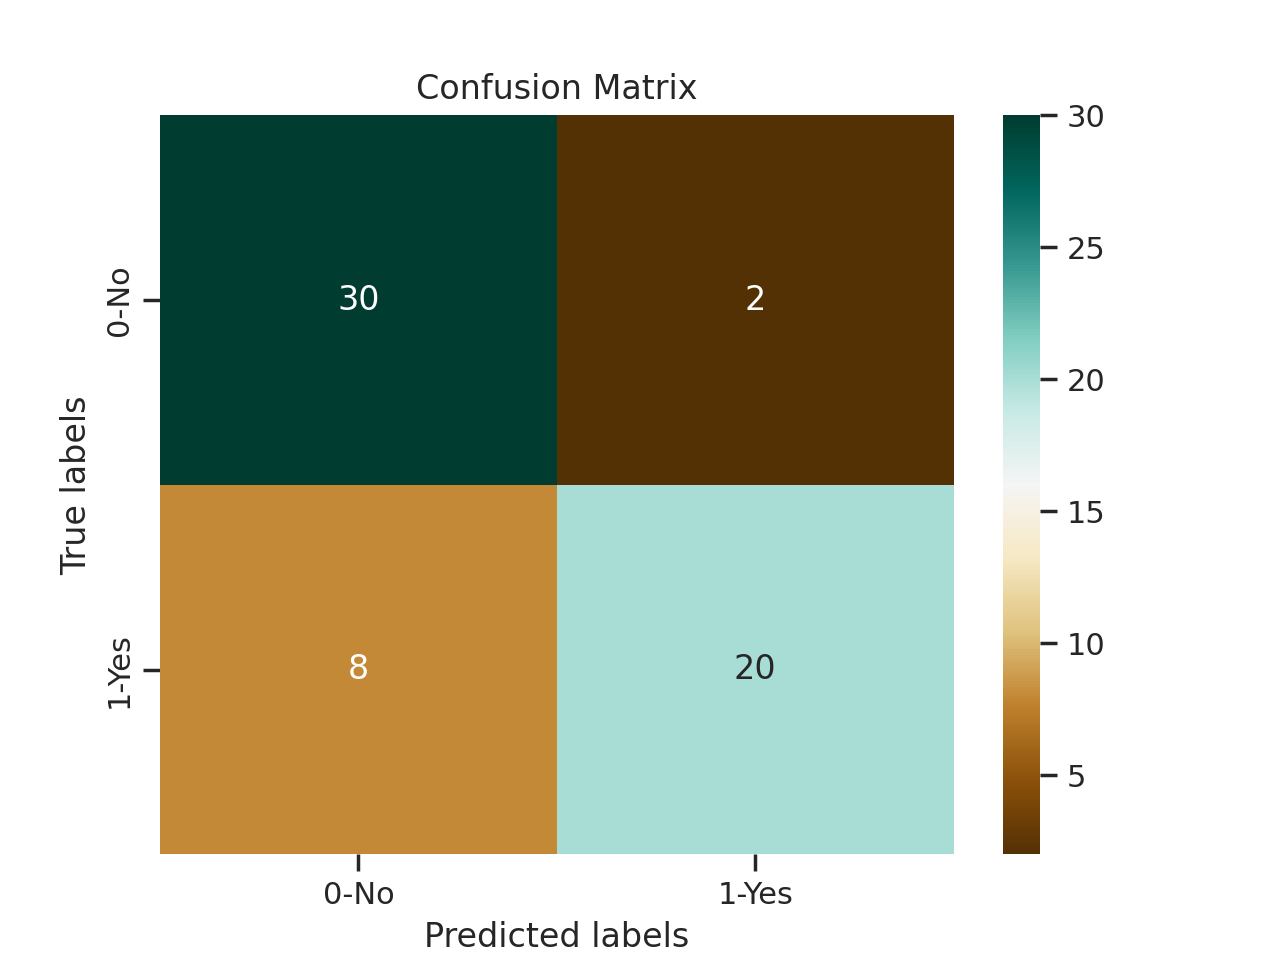

In [ ]:
# Confusion Matrix for Lasso - L1-norm
confusion_L1 = metrics.confusion_matrix(y_test, y_pred_L1)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_L1, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

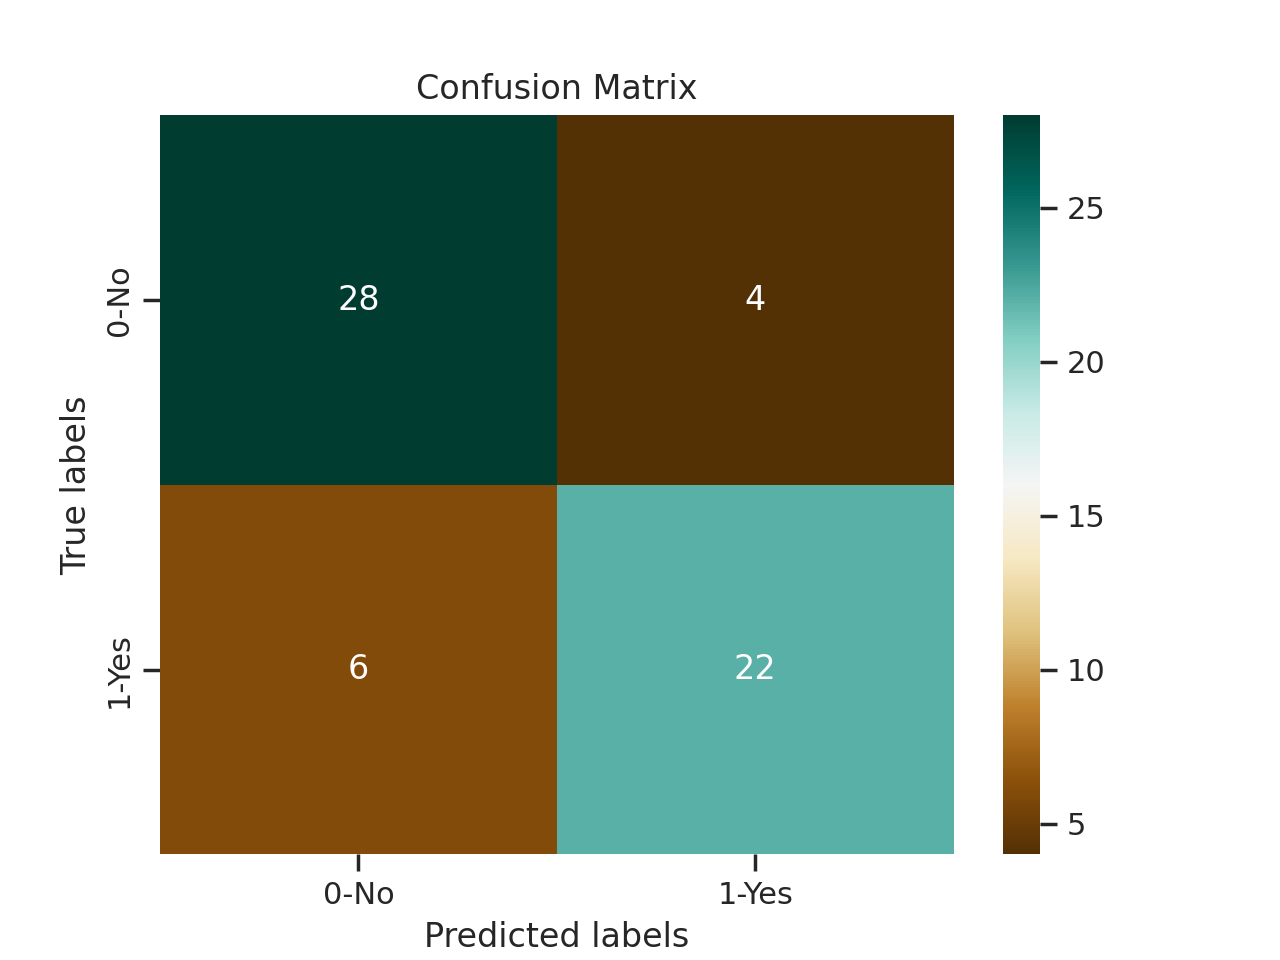

In [ ]:
# Confusion Matrix for Lasso - L1-norm
confusion_L2 = metrics.confusion_matrix(y_test, y_pred_L2)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_L2, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_L1))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86        32
           1       0.91      0.71      0.80        28

    accuracy                           0.83        60
   macro avg       0.85      0.83      0.83        60
weighted avg       0.85      0.83      0.83        60



In [ ]:
print(classification_report(y_test, y_pred_L2))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85        32
           1       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



**Probability associated with each prediction**

In [ ]:
# Probabilities of the test set being 0 and 1: LASSO
y_pred_proba_L1 = Log_Reg_L1.predict_proba(X_test_scaled)[:,1]
y_pred_L1

print(y_pred_proba_L1[:5])
print(y_pred_L1[:5])

[0.10650788 0.25169218 0.42334077 0.39718587 0.41977019]
[0 0 0 0 0]


In [ ]:
# Probabilities of the test set being 0 and 1: Ridge
y_pred_proba_L2 = Log_Reg_L2.predict_proba(X_test_scaled)[:,1]
y_pred_L2

print(y_pred_proba_L2[:5])
print(y_pred_L2[:5])

[0.04710974 0.09075763 0.54509587 0.26562129 0.39204543]
[0 0 1 0 0]


In [ ]:
# Determining the fpr and tpr at each threshold value for logistic regression using Lasso
fpr, tpr,thresholds= metrics.roc_curve(y_true = y_test, y_score = y_pred_proba_L1)

# Defining dataframe with fpr and tpr at each threshold value for logistic regression using Lasso
df = pd.DataFrame()
df['fpr'] = fpr
df['tpr'] = tpr

# Check
print(thresholds[:5])

[1.96607219 0.96607219 0.71791816 0.69811365 0.48678232]


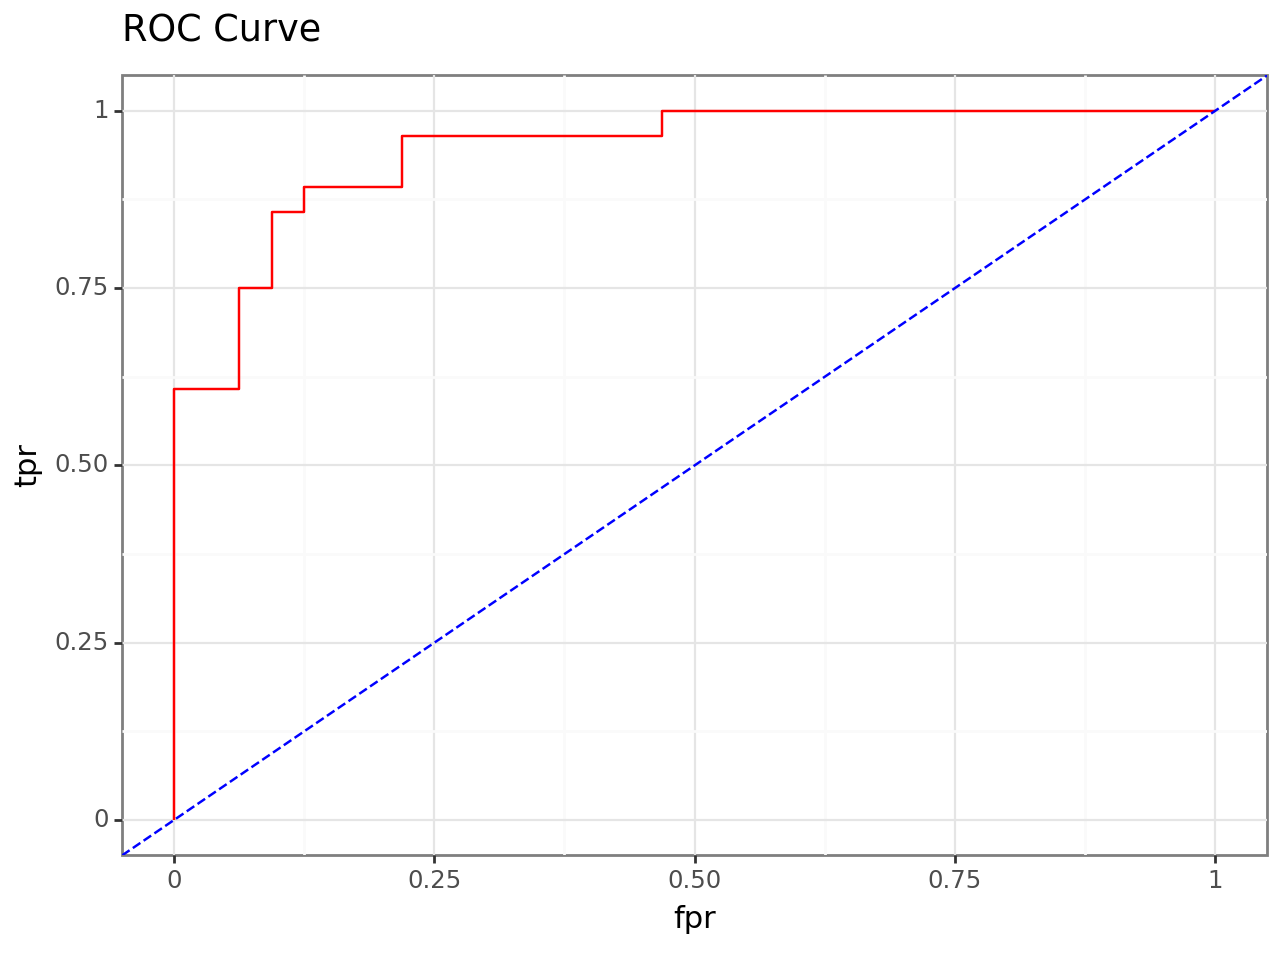

In [ ]:
from plotnine import *
import warnings; warnings.simplefilter('ignore')

p = ggplot(mapping = aes(x = fpr, y = tpr), data = df)
p += geom_line(color = 'red')
p += geom_abline(aes(intercept=0, slope=1), linetype = 'dashed', colour = 'blue')
p += labs(title = 'ROC Curve', x = 'fpr', y = 'tpr')
p += theme_bw()

print(p)

In [ ]:
# Area Under the ROC curve (AUC) -RIDGE
print(round(metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_L1),3))

0.944


In [ ]:
# Determining the fpr and tpr at each threshold value for logistic regression using Ridge
fpr, tpr,thresholds= metrics.roc_curve(y_true = y_test, y_score = y_pred_proba_L2)

# Defining dataframe with fpr and tpr at each threshold value for logistic regression using Lasso
df_l2 = pd.DataFrame()
df_l2['fpr'] = fpr
df_l2['tpr'] = tpr

# Check
print(thresholds[:5])

[1.98958699 0.98958699 0.87074285 0.86923811 0.73521173]


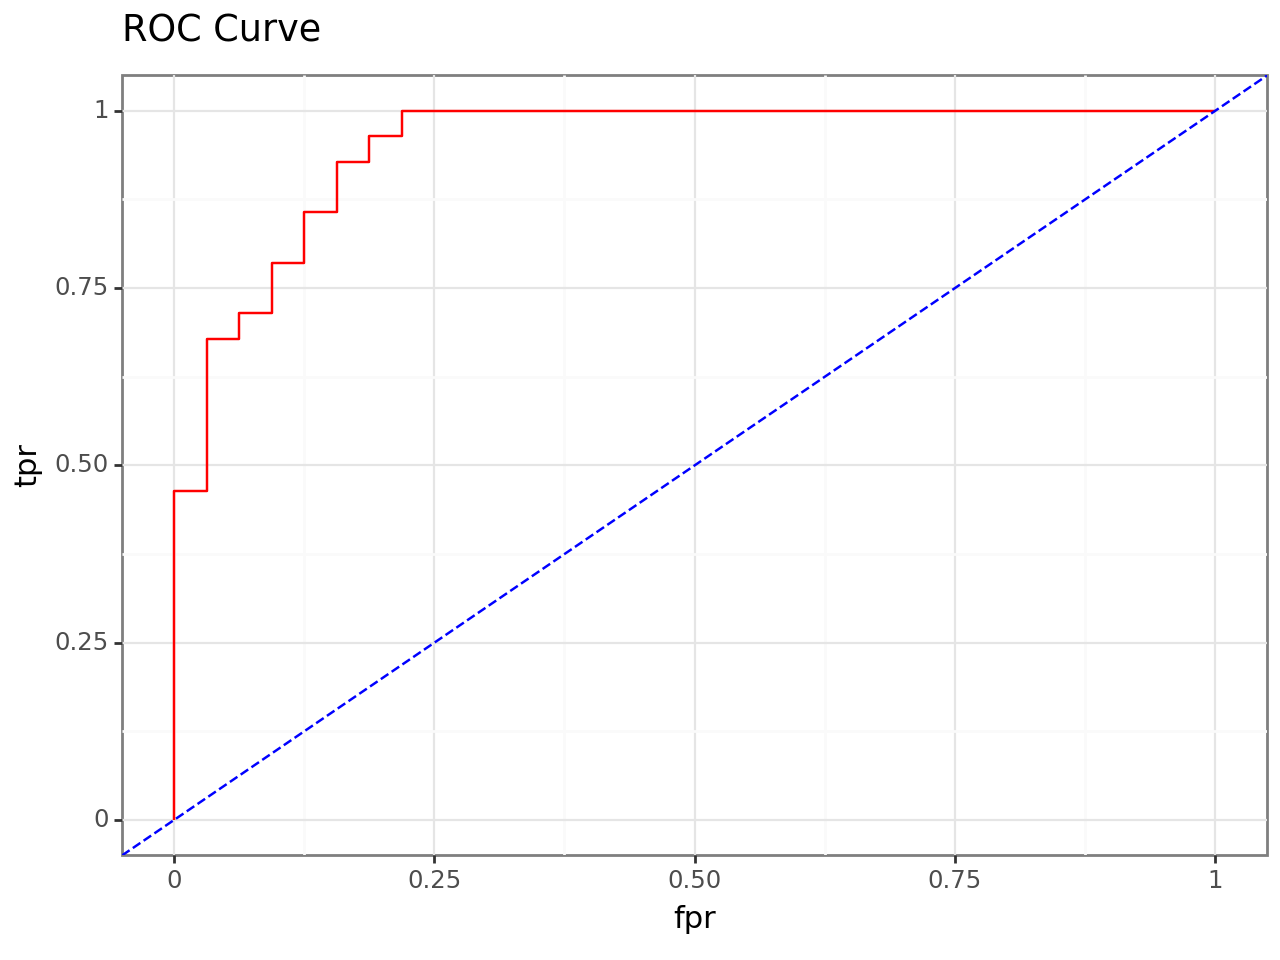

In [ ]:
from plotnine import *
import warnings; warnings.simplefilter('ignore')

p = ggplot(mapping = aes(x = fpr, y = tpr), data = df_l2)
p += geom_line(color = 'red')
p += geom_abline(aes(intercept=0, slope=1), linetype = 'dashed', colour = 'blue')
p += labs(title = 'ROC Curve', x = 'fpr', y = 'tpr')
p += theme_bw()

print(p)

In [ ]:
# Area Under the ROC curve (AUC) -RIDGE
print(round(metrics.roc_auc_score(y_true = y_test, y_score = y_pred_proba_L2),3))

0.95


---

#### **C. Decision Tree**

**1. with no pruning**

In [ ]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [ ]:
simple_decision_tree = DecisionTreeClassifier(random_state=0)
simple_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [ ]:
print("Accuracy on training set: {:.3f}".format(simple_decision_tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(simple_decision_tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.683


[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

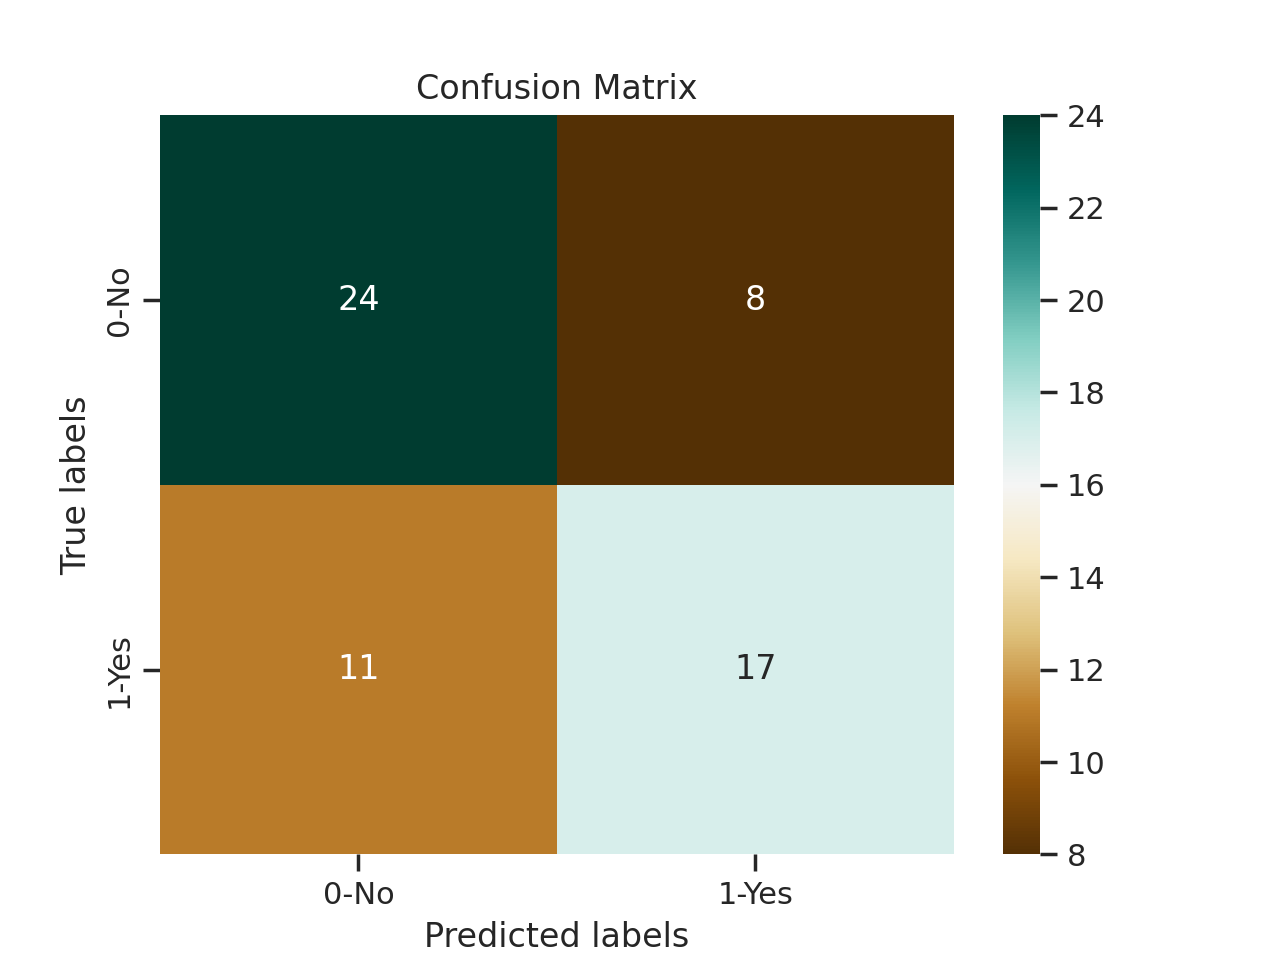

In [ ]:
# Confusion Matrix for decision tree
y_pred_tree= simple_decision_tree.predict(X_test)
confusion_tree = metrics.confusion_matrix(y_test, y_pred_tree)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_tree, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_tree))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        32
           1       0.68      0.61      0.64        28

    accuracy                           0.68        60
   macro avg       0.68      0.68      0.68        60
weighted avg       0.68      0.68      0.68        60



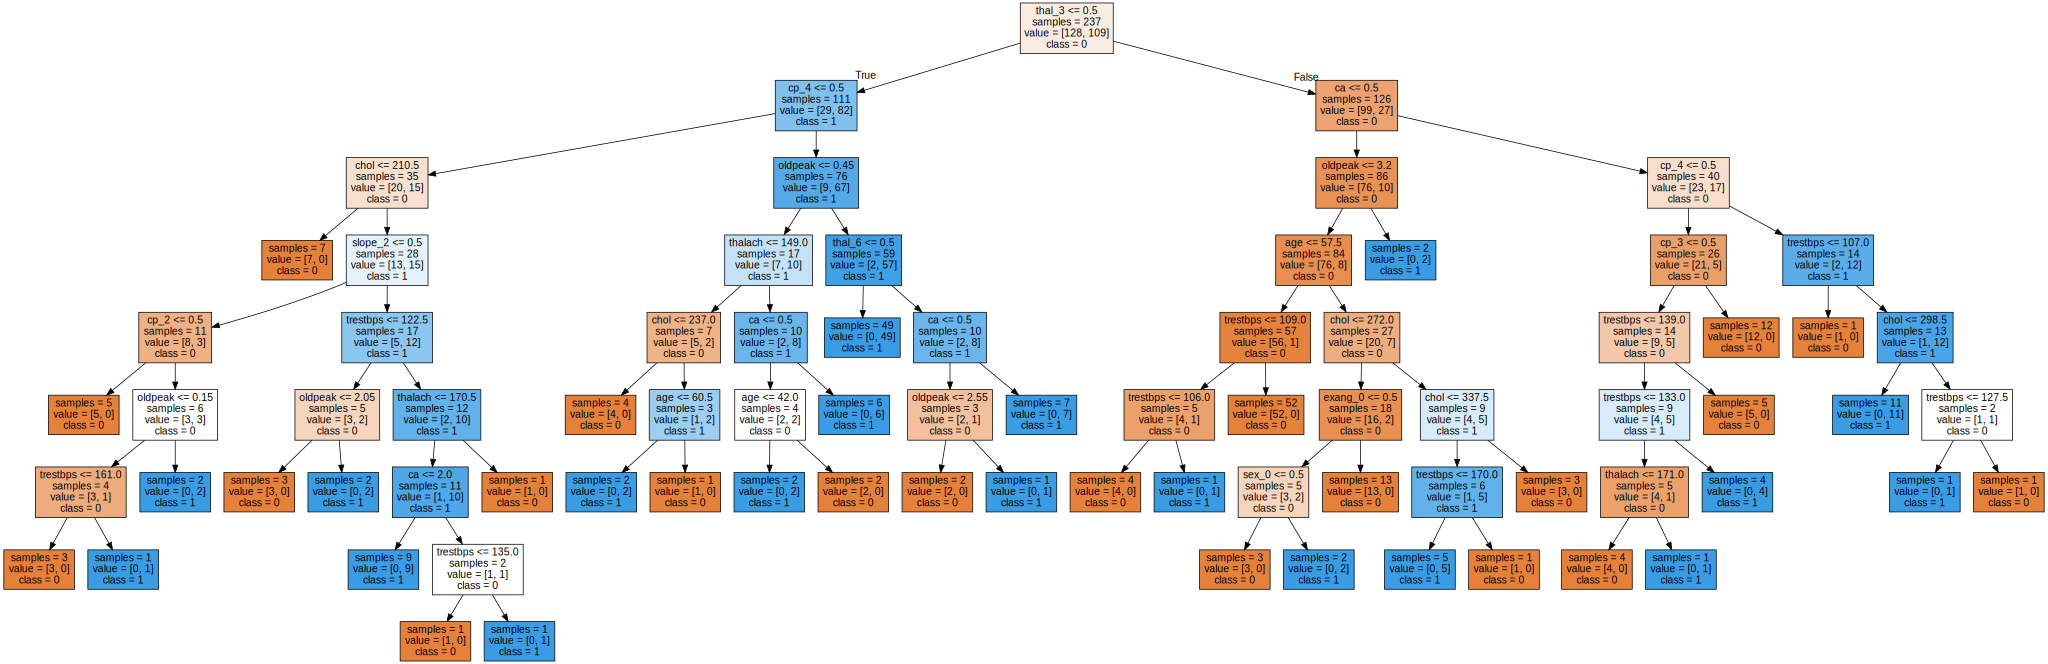

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(simple_decision_tree, out_file='tree.dot', class_names=["0","1"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

**2. Pre-pruning the tree**

In [ ]:
decision_tree_max_depth3 = DecisionTreeClassifier(random_state=0, max_depth = 3)
decision_tree_max_depth3.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(decision_tree_max_depth3.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(decision_tree_max_depth3.score(X_test, y_test)))

Accuracy on training set: 0.844
Accuracy on test set: 0.800


[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

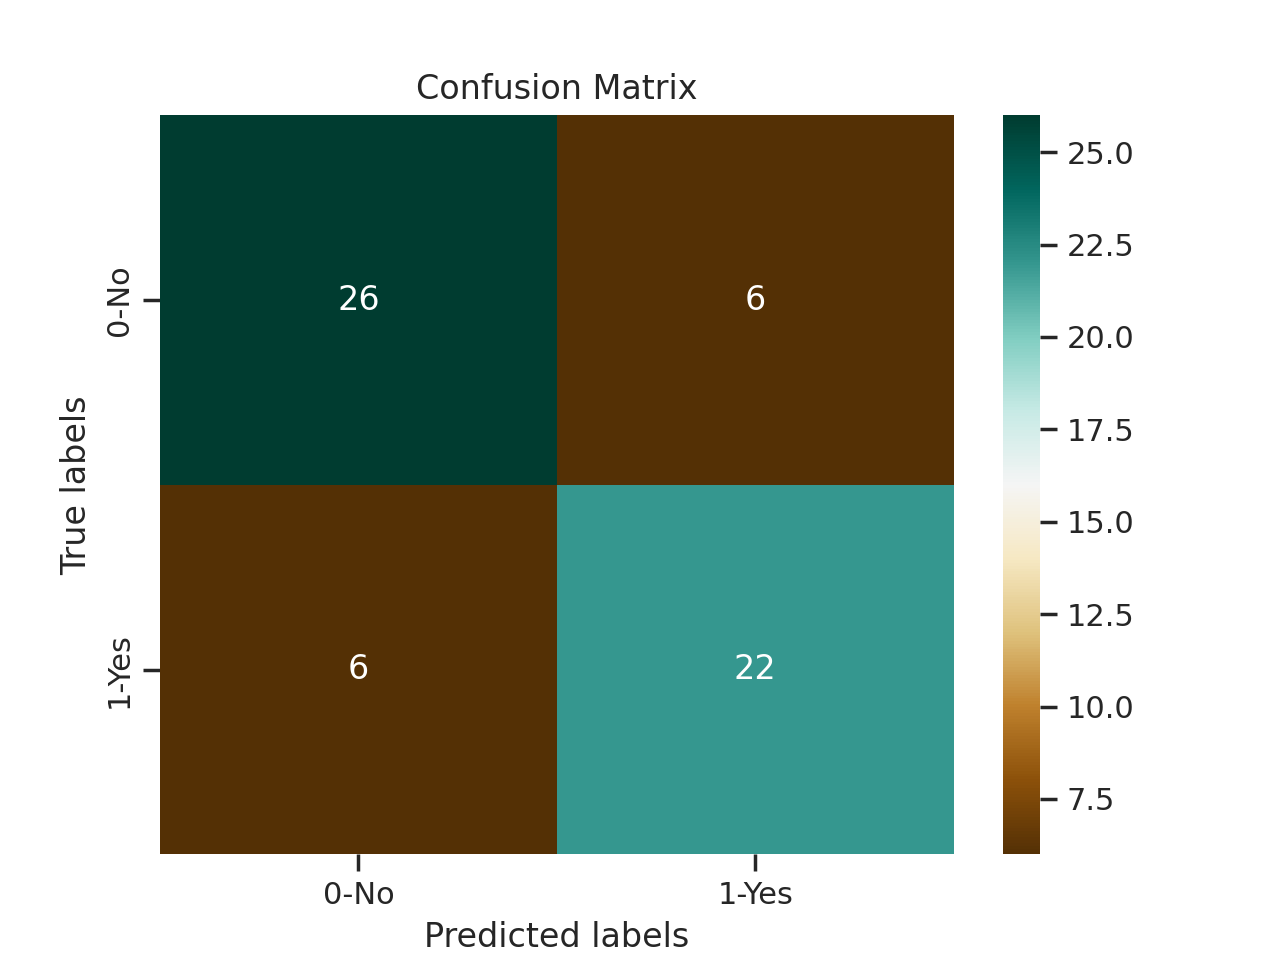

In [ ]:
# Confusion Matrix for decision tree
y_pred_tree_max_depth3= decision_tree_max_depth3.predict(X_test)
confusion_tree_max_depth3 = metrics.confusion_matrix(y_test, y_pred_tree_max_depth3)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_tree_max_depth3, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_tree_max_depth3))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        32
           1       0.79      0.79      0.79        28

    accuracy                           0.80        60
   macro avg       0.80      0.80      0.80        60
weighted avg       0.80      0.80      0.80        60



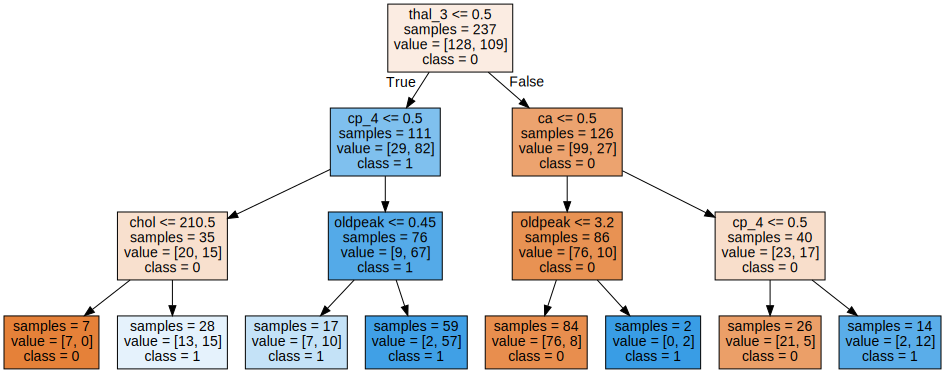

In [ ]:
from sklearn.tree import export_graphviz
export_graphviz(decision_tree_max_depth3, out_file='tree.dot', class_names=["0","1"],
                feature_names=X.columns, impurity=False, filled=True)

import graphviz
import os

with open('tree.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
# Creating DataFrame with the features names and features importance
F_importance = pd.concat([pd.DataFrame(X.columns,columns=['Features']),
                  pd.DataFrame(np.transpose(decision_tree_max_depth3.feature_importances_),columns=['Feature Importance'])],
                 axis = 1)

# Sorting new DataFrame by feature importance (Sort Descending)
F_importance = F_importance.sort_values(by='Feature Importance', ascending=False)
F_importance

,Features,Feature Importance
22,thal_3,0.493895
11,cp_4,0.272029
4,oldpeak,0.105996
5,ca,0.079177
2,chol,0.048903
0,age,0.000000
15,restecg_1,0.000000
23,thal_6,0.000000
21,slope_3,0.000000
20,slope_2,0.000000


In [ ]:
def plot_feature_importances(model):
    plt.rcParams["figure.figsize"] = (6,4)
    #locate indices of the features with feature importance greater than 0.01. Sort descending
    indices = np.argsort(decision_tree_max_depth3.feature_importances_)
    indices = indices[-5:]

    # Rearrange feature names so they match the sorted feature importances
    columns_name = [X.columns[i] for i in indices]

    #extract the number of features that have non-zero feature importance
    n_features = X.iloc[:,indices].shape[1]

    # Create plot
    plt.figure()
    plt.title("Feature Importance")
    plt.xlabel("Feature")
    plt.ylabel("Feature Importance")
    plt.barh(range(n_features), model.feature_importances_[indices])
    plt.yticks(range(n_features), columns_name)
    plt.show()

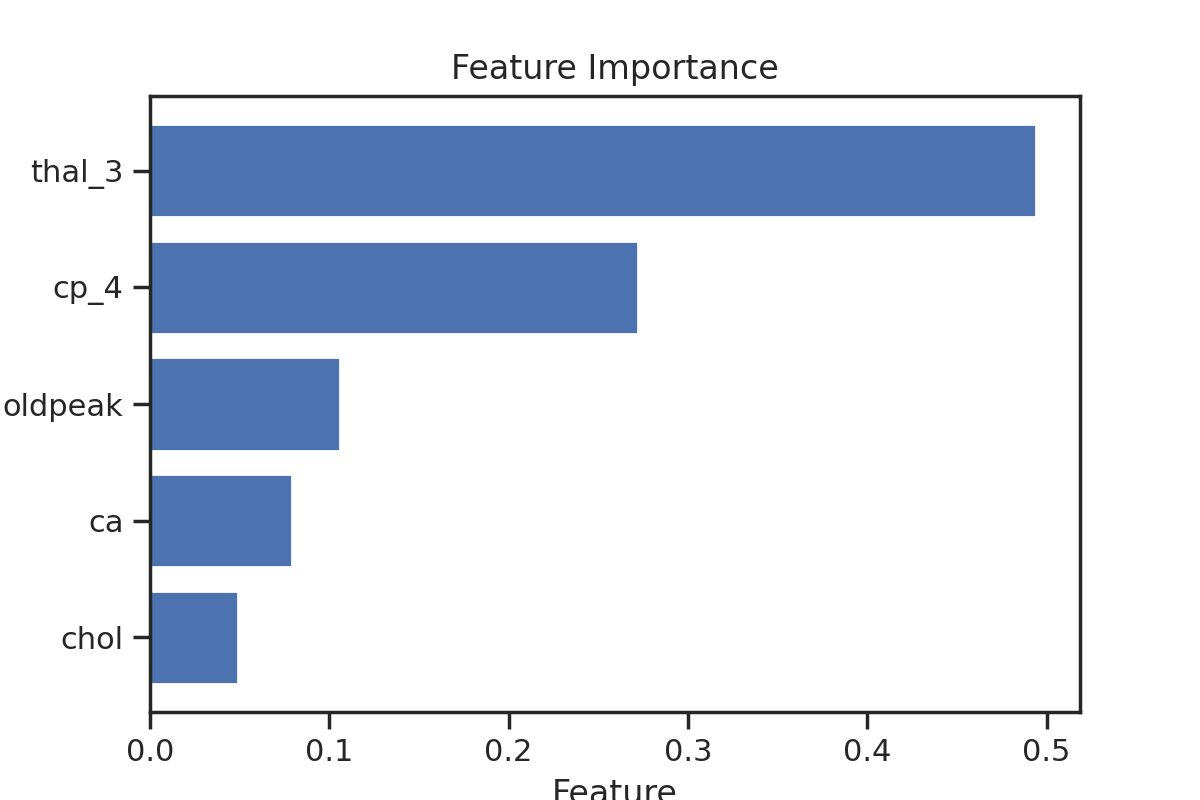

In [ ]:
plot_feature_importances(decision_tree_max_depth3)

**3. Gradient Boosted Decision trees**

In [ ]:
import warnings; warnings.simplefilter('ignore')
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
gbt = GradientBoostingClassifier(random_state=0)

In [ ]:
gbt.fit(X_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
print("Accuracy on training set: {:.3f}".format(gbt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(gbt.score(X_test, y_test)))

Accuracy on training set: 0.996
Accuracy on test set: 0.817


[Text(0, 0.5, '0-No'), Text(0, 1.5, '1-Yes')]

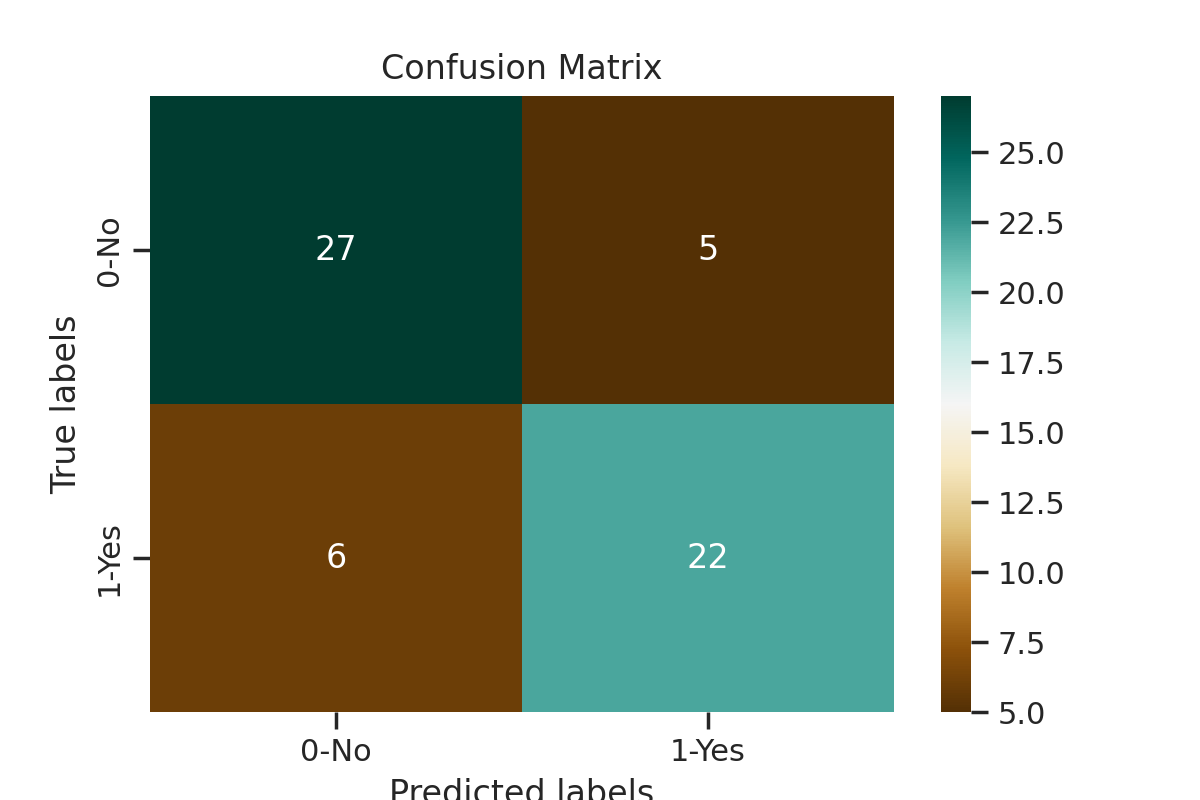

In [ ]:
# Confusion Matrix for decision tree
y_pred_gbt = gbt.predict(X_test)
confusion_tree_gbt = metrics.confusion_matrix(y_test, y_pred_gbt)

# Visualising the confusion matrix
labels = {'0-No', '1-Yes'}
ax= plt.subplot()
sns.heatmap(confusion_tree_gbt, annot=True, fmt='.0f', ax= ax, cmap="BrBG")

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['0-No', '1-Yes']); ax.yaxis.set_ticklabels(['0-No', '1-Yes'])

In [ ]:
# Classification Report
print(classification_report(y_test, y_pred_gbt))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        32
           1       0.81      0.79      0.80        28

    accuracy                           0.82        60
   macro avg       0.82      0.81      0.82        60
weighted avg       0.82      0.82      0.82        60

